##

# <center><font color=lightblue> 5240 Group 1 - March the 26th, 2023 </center></font>

## <center><font color=black>Linear Regression: TX Income based on demographics</font> </center> 

## ML Aproach

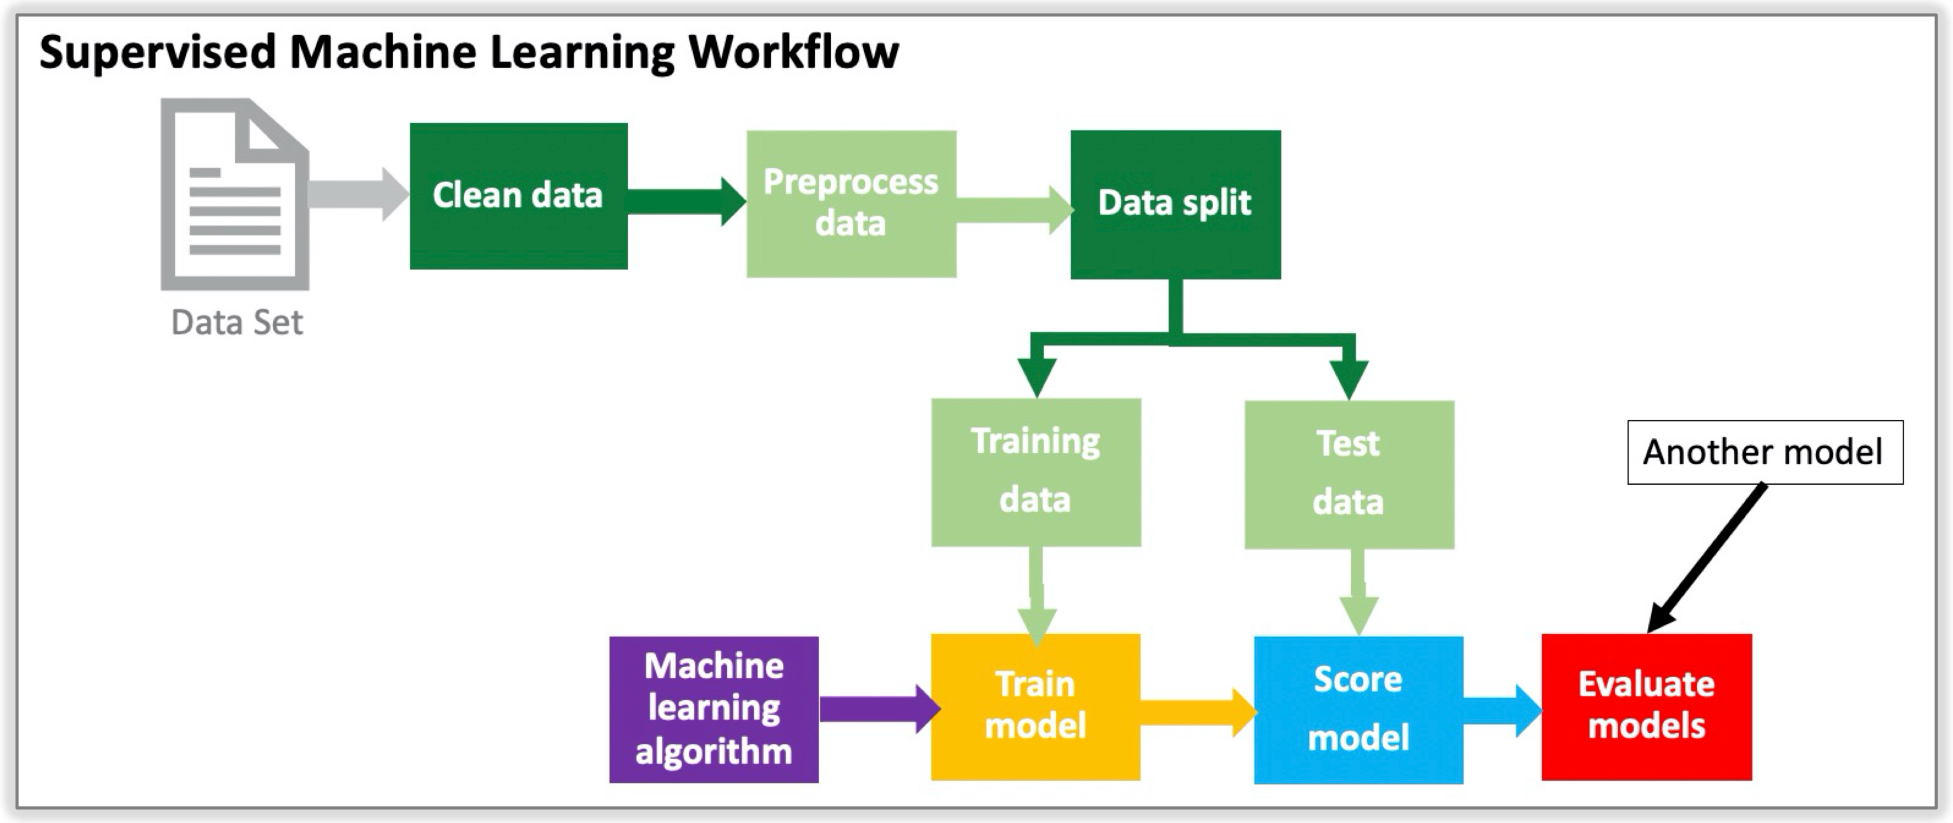

### Import Libraries 
-	import pandas and numpy libraries
-	import scatter_matrix from pandas.plotting
-	import LinearRegression from sklearn.linear_model
-	import train_test_split, KFold, and cross_val_score from sklearn.model_selection 
-	import matplotlib
-	import seaborn

In [1]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import matplotlib as mp
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
import seaborn as sns


## <font color=lightblue> LOAD DATA SET </font>

# 1. Load data and create DataFrame

### 1.1 Create from csv

In [2]:
df =pd.read_csv('C:\\Users\\palom\\5240\\psam_p48.csv')

# 2. Read

## 2.1 Show top 2 and Bottom 5 rows

In [3]:
df.head(2)

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2021GQ0000009,7,1,4615,3,48,1029928,31,21,...,33,0,30,0,30,0,1,1,0,29
1,P,2021GQ0000014,7,1,2508,3,48,1029928,25,19,...,51,0,25,24,25,49,0,25,24,0


In [4]:
df.tail(5)

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
261441,P,2021HU1415640,7,1,2322,3,48,1029928,46,61,...,14,45,41,81,14,50,45,15,45,71
261442,P,2021HU1415640,7,2,2322,3,48,1029928,78,61,...,26,80,65,138,23,77,81,26,83,130
261443,P,2021HU1415668,7,1,4629,3,48,1029928,248,44,...,245,242,249,429,76,406,225,71,73,429
261444,P,2021HU1415668,7,2,4629,3,48,1029928,288,53,...,278,271,269,482,93,526,283,81,87,506
261445,P,2021HU1415668,7,3,4629,3,48,1029928,303,15,...,293,302,274,543,89,505,288,85,93,500


## 3. Filter columns

In [224]:
df.columns

Index(['RT', 'SERIALNO', 'DIVISION', 'SPORDER', 'PUMA', 'REGION', 'ST',
       'ADJINC', 'PWGTP', 'AGEP',
       ...
       'PWGTP71', 'PWGTP72', 'PWGTP73', 'PWGTP74', 'PWGTP75', 'PWGTP76',
       'PWGTP77', 'PWGTP78', 'PWGTP79', 'PWGTP80'],
      dtype='object', length=287)

### Description of selected data fields 

* ST:        State Code based on 2010 Census definitions
* AGEP:	    Age
* COW:	    Class of worker
* ENG:	    Ability to speak English
* SCHL:	    Educational attainment
* SEX:	    Sex
* WAGP:	    Wages or salary income past 12 months (use ADJINC to adjust WAGP to constant dollars)
* WKHP:	    Usual hours worked per week past 12 months
* JWAP:	    Time of arrival at work - hour and minute
* JWDP:	    Time of departure for work - hour and minute
* MIGSP:	    Migration recode - State or foreign country code
* NAICSP:    North American Industry Classification System (NAICS) recode for 2018 and later based on 2017 NAICS codes
* NOP:	    Nativity of parent
* OCCP:	    Occupation recode for 2018 and later based on 2018 OCC codes
* PERNP:	    Total person's earnings (use ADJINC to adjust to constant dollars)
* PINCP:	    Total person's income (signed, use ADJINC to adjust to constant dollars)
* POBP:	    Place of birth (Recode)
* SCIENGP:	Field of Degree Science and Engineering Flag - NSF Definition
* SCIENGRLP: Field of Degree Science and Engineering Related Flag - NSF Definition
* SOCP:	    Standard Occupational Classification (SOC) codes for 2018 and later based on 2018 SOC codes
* WAOB:	    World area of birth
* FAGEP:	    Age allocation flag
* FSEMP:     Self employment Flag
* PWGTP:	    Person's weight
* RACASN:	Asian recode (Asian alone or in combination with one or more other races)
* RACBLK:	Black or African American recode (Black alone or in combination with one or more other races)
* RACWHT:	White recode (White alone or in combination with one or more other races)





In [5]:
df2 = df[{'MIGSP','NAICSP','NOP','PERNP','PINCP','SCIENGP','SCIENGRLP','SOCP','WAOB','AGEP','SEX',
          'POBP','COW','RT','ENG','SCHL','WAGP','WKHP','JWAP','JWDP','OCCP','POBP','ST','NATIVITY','FSEMP','PWGTP',
          'RACASN','RACBLK','RACWHT'}]

C:\Users\palom\AppData\Local\Temp\ipykernel_13200\3040542100.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df2 = df[{'MIGSP','NAICSP','NOP','PERNP','PINCP','SCIENGP','SCIENGRLP','SOCP','WAOB','AGEP','SEX',


In [6]:
df2.head(10)

,ST,RACASN,PINCP,JWDP,PERNP,WAOB,SEX,NATIVITY,RACWHT,RACBLK,...,WAGP,RT,PWGTP,COW,POBP,JWAP,SOCP,NOP,OCCP,FSEMP
0,48,0,7000.0,118.0,7000.0,1,1,1,1,0,...,7000.0,P,31,1.0,48,199.0,353031,NaN,4110.0,0
1,48,0,0.0,NaN,0.0,1,1,1,0,1,...,0.0,P,25,NaN,36,NaN,NaN,NaN,NaN,0
2,48,0,0.0,NaN,0.0,1,1,1,1,0,...,0.0,P,19,1.0,48,NaN,472211,NaN,6520.0,0
3,48,0,13500.0,NaN,0.0,1,1,1,0,1,...,0.0,P,12,NaN,48,NaN,NaN,NaN,NaN,0
4,48,0,10800.0,NaN,0.0,1,1,1,1,0,...,0.0,P,16,NaN,48,NaN,NaN,NaN,NaN,0
5,48,0,0.0,NaN,0.0,5,1,2,1,0,...,0.0,P,56,NaN,110,NaN,NaN,NaN,NaN,0
6,48,0,0.0,NaN,0.0,1,1,1,0,0,...,0.0,P,60,NaN,48,NaN,NaN,NaN,NaN,0
7,48,0,0.0,NaN,0.0,1,1,1,1,0,...,0.0,P,25,NaN,6,NaN,NaN,NaN,NaN,0
8,48,0,0.0,NaN,0.0,1,1,1,1,0,...,0.0,P,8,NaN,48,NaN,NaN,NaN,NaN,1
9,48,0,13000.0,100.0,13000.0,1,1,1,1,0,...,13000.0,P,16,1.0,48,162.0,537065,NaN,9645.0,0


In [7]:
print(df.shape)

(261446, 287)


In [8]:
df2.dtypes

ST             int64
RACASN         int64
PINCP        float64
JWDP         float64
PERNP        float64
WAOB           int64
SEX            int64
NATIVITY       int64
RACWHT         int64
RACBLK         int64
SCIENGP      float64
SCHL         float64
MIGSP        float64
NAICSP        object
AGEP           int64
SCIENGRLP    float64
ENG          float64
WKHP         float64
WAGP         float64
RT            object
PWGTP          int64
COW          float64
POBP           int64
JWAP         float64
SOCP          object
NOP          float64
OCCP         float64
FSEMP          int64
dtype: object

# <font color=lightblue> Clean and Preprocess the Dataset </font>

## 1. Clean the data
-	Find and Mark Missing Values 

In [9]:
df2.isnull().sum()

ST                0
RACASN            0
PINCP         45410
JWDP         166266
PERNP         48880
WAOB              0
SEX               0
NATIVITY          0
RACWHT            0
RACBLK            0
SCIENGP      197341
SCHL           7952
MIGSP        226887
NAICSP       109139
AGEP              0
SCIENGRLP    197341
ENG          186811
WKHP         131782
WAGP          45410
RT                0
PWGTP             0
COW          109139
POBP              0
JWAP         166266
SOCP         109139
NOP          208561
OCCP         109139
FSEMP             0
dtype: int64

In [10]:
df3 = df2[df2['COW'].notna()]

In [11]:
df4 = df3[df3['WKHP'].notna()]

In [12]:
df4['SCIENGP'] = df4['SCIENGP'].fillna(0)

C:\Users\palom\AppData\Local\Temp\ipykernel_13200\2680412488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['SCIENGP'] = df4['SCIENGP'].fillna(0)


In [13]:
print(df4.shape)

(129664, 28)


In [14]:
df4.isnull().sum()

ST                0
RACASN            0
PINCP             0
JWDP          34484
PERNP             0
WAOB              0
SEX               0
NATIVITY          0
RACWHT            0
RACBLK            0
SCIENGP           0
SCHL              0
MIGSP        110606
NAICSP            0
AGEP              0
SCIENGRLP     82852
ENG           88670
WKHP              0
WAGP              0
RT                0
PWGTP             0
COW               0
POBP              0
JWAP          34484
SOCP              0
NOP          127911
OCCP              0
FSEMP             0
dtype: int64

In [16]:
df5 = df4[{'NAICSP','PERNP','PINCP','SOCP','WAOB','AGEP','SEX','SCIENGP',
          'POBP','COW','RT','SCHL','WAGP','WKHP','OCCP','POBP','FSEMP','RACASN','RACBLK','RACWHT','PWGTP'}]

C:\Users\palom\AppData\Local\Temp\ipykernel_13200\3447267456.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df5 = df4[{'NAICSP','PERNP','PINCP','SOCP','WAOB','AGEP','SEX','SCIENGP',


In [17]:
df5.isnull().sum()

RACASN     0
PINCP      0
PERNP      0
WAOB       0
SEX        0
RACWHT     0
RACBLK     0
SCIENGP    0
SCHL       0
NAICSP     0
AGEP       0
WKHP       0
WAGP       0
RT         0
PWGTP      0
COW        0
POBP       0
SOCP       0
OCCP       0
FSEMP      0
dtype: int64

In [18]:
print(df5.shape)

(129664, 20)


## 2. Performing the Exploratory Data Analysis (EDA) 
-	Print a count of the number of rows (observations) and columns (variables)
-	Print the data types of all variables
-	Print a summary statistics of the data

In [125]:
df5.describe()

,POBP,FSEMP,RACBLK,OCCP,PINCP,AGEP,RACASN,WAGP,SEX,SCIENGP,COW,PERNP,WKHP,SCHL,RACWHT,PWGTP,WAOB
count,129664.000000,129664.000000,129664.000000,129664.000000,1.296640e+05,129664.000000,129664.000000,129664.000000,129664.000000,129664.000000,129664.000000,129664.000000,129664.000000,129664.000000,129664.000000,129664.000000,129664.000000
mean,88.852480,0.158895,0.099688,4103.373118,6.075186e+04,42.917101,0.069402,52085.459650,1.465627,0.584511,2.102635,55968.915836,39.121815,18.277055,0.744586,117.242357,1.542788
std,102.200954,0.365580,0.299585,2713.268667,7.708049e+04,15.277441,0.254138,67908.465601,0.498819,0.830562,1.852596,71724.136602,13.094686,3.875669,0.436095,108.011057,1.150909
min,1.000000,0.000000,0.000000,10.000000,-8.400000e+03,16.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-8400.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,47.000000,0.000000,0.000000,2025.000000,2.000000e+04,30.000000,0.000000,13000.000000,1.000000,0.000000,1.000000,17000.000000,36.000000,16.000000,0.000000,51.000000,1.000000
50%,48.000000,0.000000,0.000000,4110.000000,4.000000e+04,42.000000,0.000000,35000.000000,1.000000,0.000000,1.000000,37500.000000,40.000000,19.000000,1.000000,84.000000,1.000000
75%,48.000000,0.000000,0.000000,5740.000000,7.200000e+04,55.000000,0.000000,65000.000000,2.000000,1.000000,3.000000,69000.000000,43.000000,21.000000,1.000000,145.000000,1.000000
max,554.000000,1.000000,1.000000,9830.000000,1.157000e+06,92.000000,1.000000,489000.000000,2.000000,2.000000,8.000000,844000.000000,99.000000,24.000000,1.000000,2471.000000,8.000000


In [126]:
df5.describe(include='object')

,NAICSP,RT,SOCP
count,129664,129664,129664
unique,269,1,529
top,23,P,1191XX
freq,10174,129664,3697


In [127]:
df5['COW'].value_counts()

1.0    86128
3.0    10502
6.0     9707
2.0     8407
4.0     5383
7.0     4742
5.0     4380
8.0      415
Name: COW, dtype: int64

In [128]:
df5['WKHP'].value_counts()

40.0    61789
50.0    10865
45.0     6707
30.0     5796
60.0     5507
        ...  
71.0        4
89.0        3
73.0        3
93.0        1
81.0        1
Name: WKHP, Length: 97, dtype: int64

In [129]:
df5['SCHL'].value_counts()

21.0    29627
16.0    25361
19.0    18732
22.0    12248
20.0    10012
18.0     9155
17.0     4761
23.0     2908
14.0     2819
1.0      2407
15.0     2378
24.0     2029
13.0     1941
12.0     1781
9.0      1328
11.0      834
10.0      342
8.0       318
6.0       262
7.0       180
5.0        98
4.0        71
2.0        38
3.0        34
Name: SCHL, dtype: int64

In [130]:
df5['WAOB'].value_counts()

1    102765
3     15399
4      7149
5      2017
6      1335
2       541
7       355
8       103
Name: WAOB, dtype: int64

In [131]:
df5['NAICSP'].value_counts(normalize=True)

23       0.078464
6111     0.070112
722Z     0.060649
622M     0.035793
611M1    0.027216
           ...   
3133     0.000039
31M      0.000031
2122     0.000031
3122     0.000015
3131     0.000008
Name: NAICSP, Length: 269, dtype: float64

# Histograms

<function matplotlib.pyplot.show(close=None, block=None)>

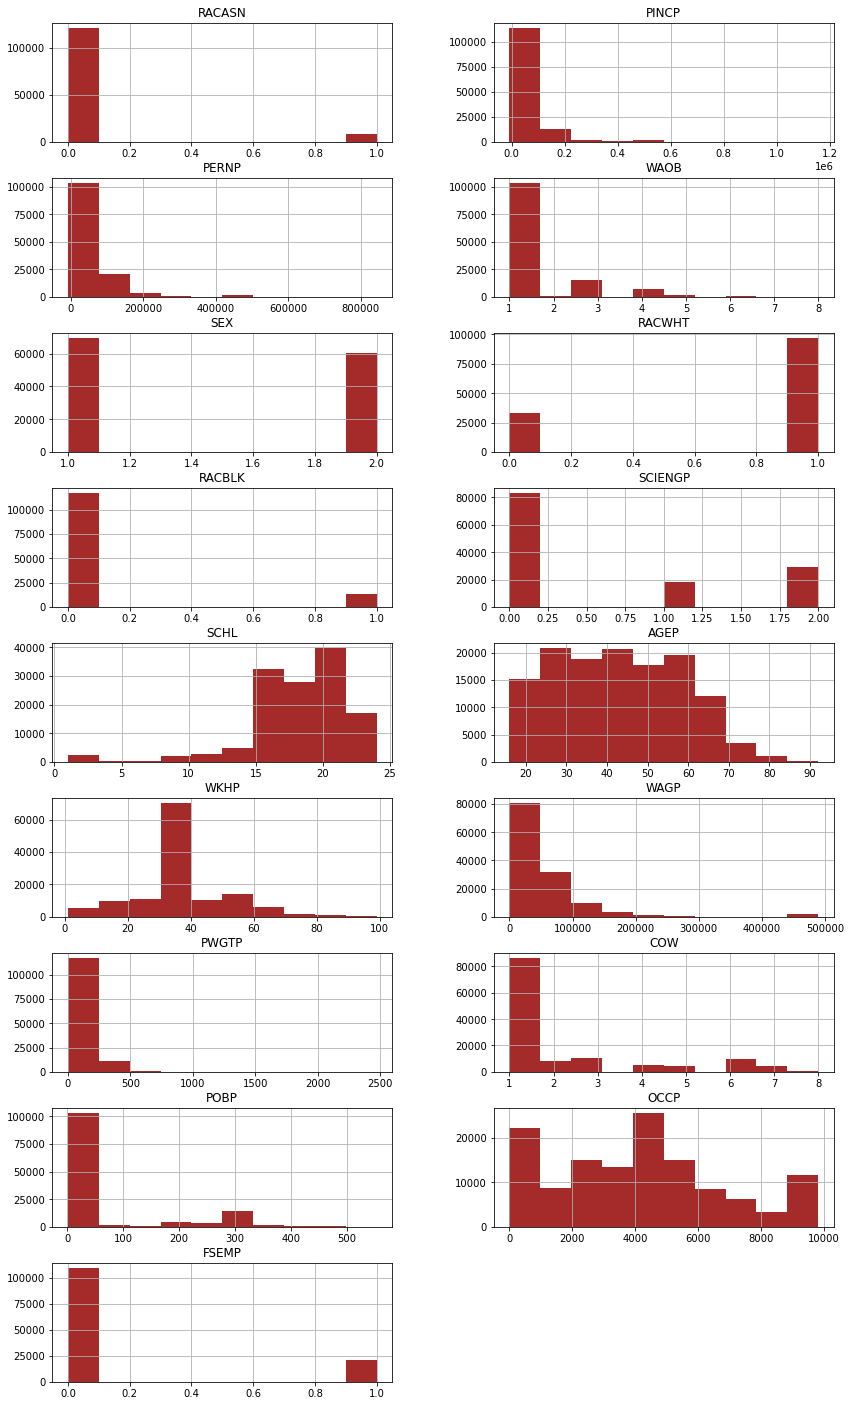

In [21]:
df5.hist(figsize=(14,25), color='brown',layout=(9,2)) 
plt.show

## Density plot

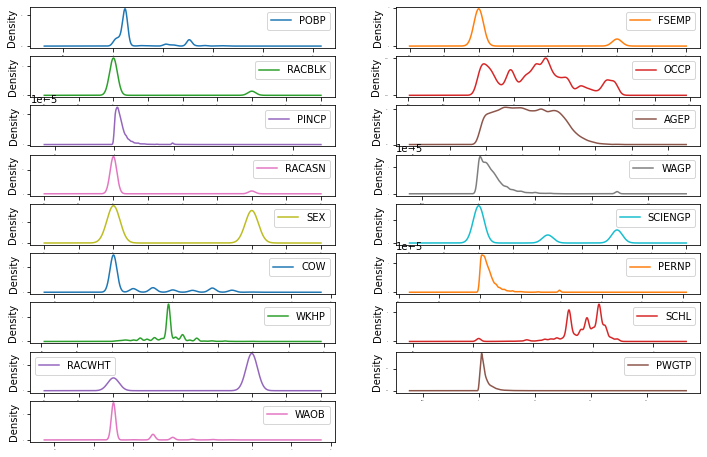

In [133]:
#df5.__delitem__('ST')

df5.plot(kind='density', subplots=True, layout=(9,2), sharex=False, legend=True, fontsize=1, figsize=(12,8)) 
plt.show()

# Boxplot

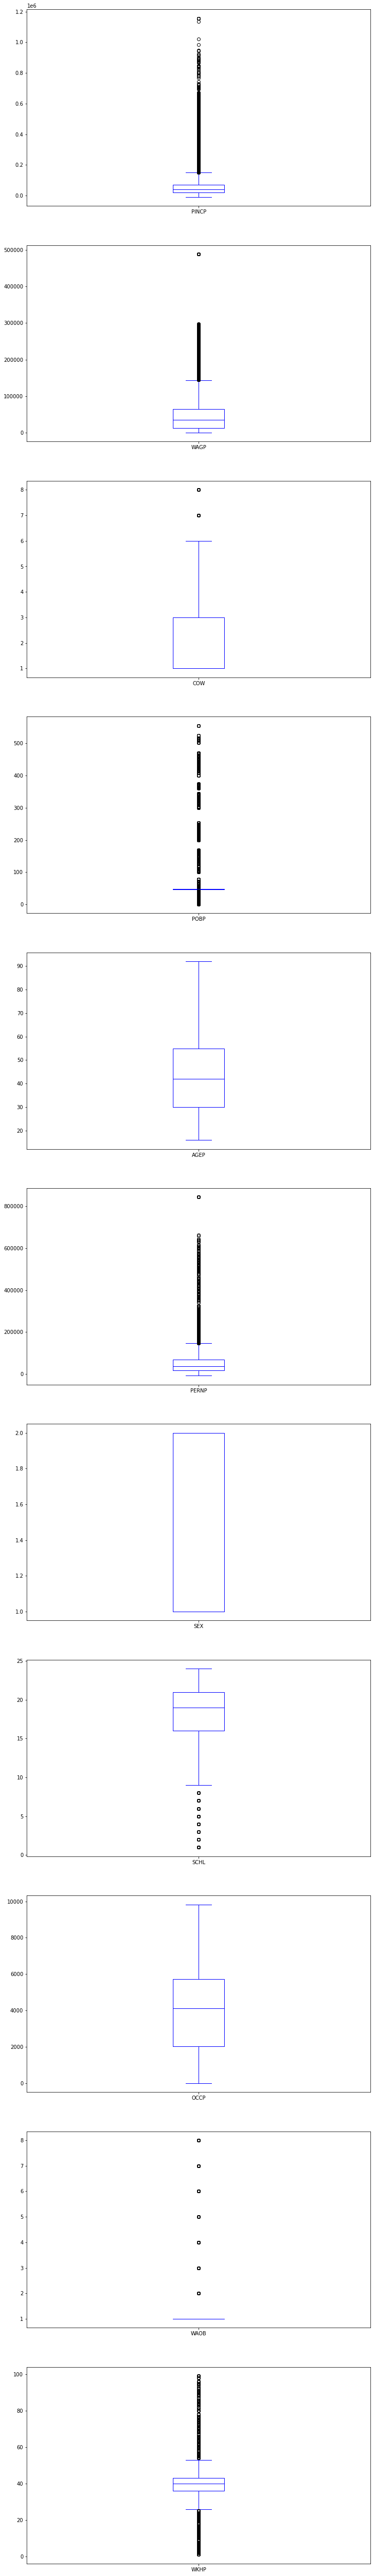

In [126]:
df5.plot(kind='box', subplots=True, layout=(12,1), sharex=False, sharey=False, color = 'blue', figsize=(12,100)) 
plt.show()

<AxesSubplot:xlabel='SEX', ylabel='AGEP'>

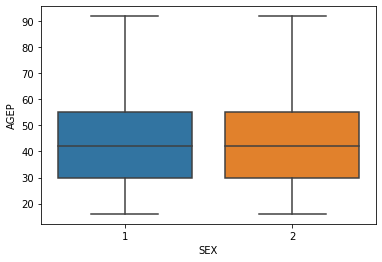

In [134]:
sns.boxplot(y='AGEP',x='SEX',data=df5)

<AxesSubplot:xlabel='SEX', ylabel='WAGP'>

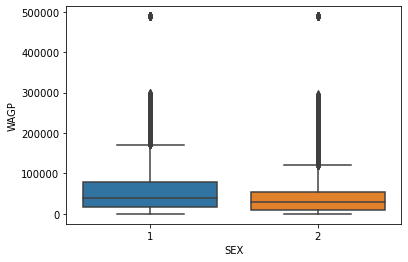

In [137]:
sns.boxplot(y='WAGP',x='SEX',data=df5)

<AxesSubplot:xlabel='RACWHT', ylabel='WAGP'>

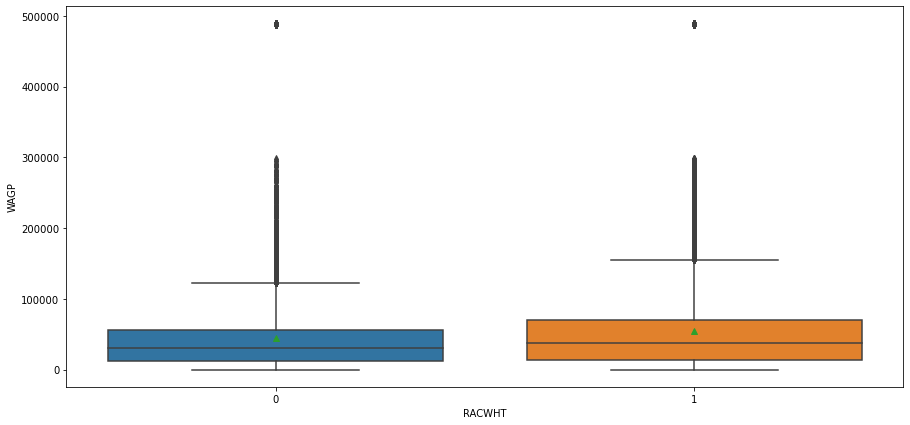

In [140]:
fig, ax = plt.subplots(figsize=[15,7])
sns.boxplot(y='WAGP',x='RACWHT',data=df5, showmeans=True, ax=ax)

<AxesSubplot:xlabel='COW', ylabel='WAGP'>

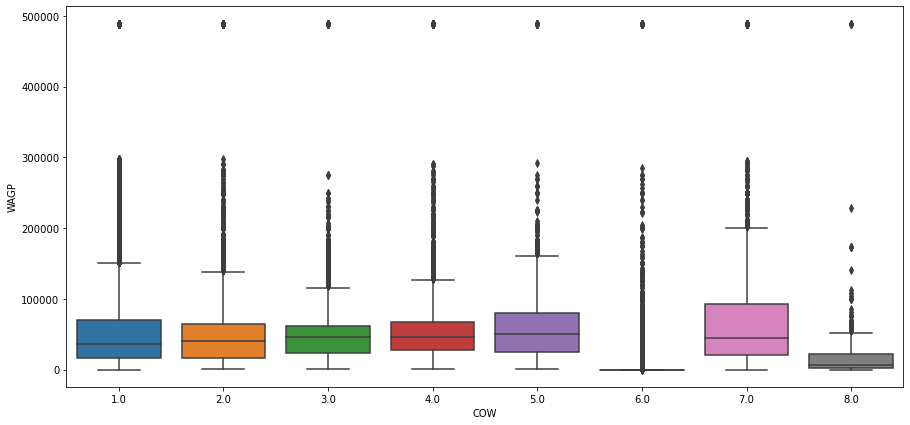

In [141]:
fig, ax = plt.subplots(figsize=[15,7])
sns.boxplot(y='WAGP',x='COW',data=df5, ax=ax)

<AxesSubplot:xlabel='WAOB', ylabel='WAGP'>

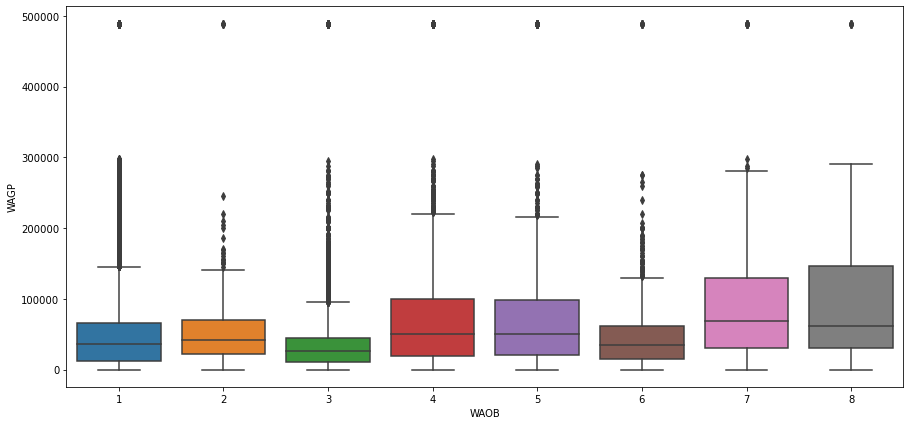

In [142]:
fig, ax = plt.subplots(figsize=[15,7])
sns.boxplot(y='WAGP',x='WAOB',data=df5,ax=ax)

<AxesSubplot:xlabel='SCHL', ylabel='WAGP'>

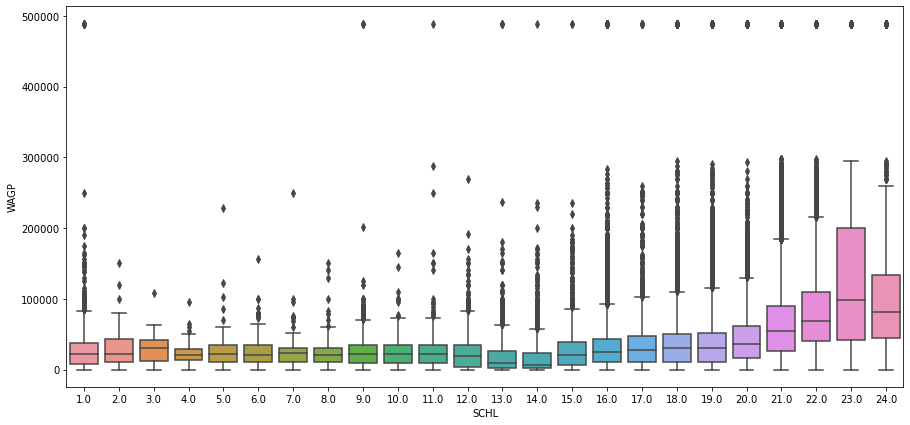

In [143]:
fig, ax = plt.subplots(figsize=[15,7])
sns.boxplot(y='WAGP',x='SCHL',data=df5,ax=ax)

<AxesSubplot:xlabel='SCIENGP', ylabel='WAGP'>

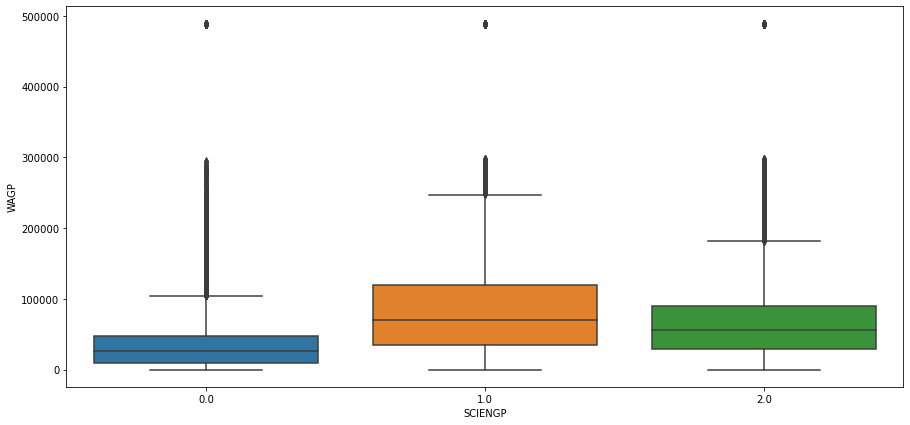

In [145]:
fig, ax = plt.subplots(figsize=[15,7])
sns.boxplot(y='WAGP',x='SCIENGP',data=df5,ax=ax)

<AxesSubplot:xlabel='SCHL', ylabel='PWGTP'>

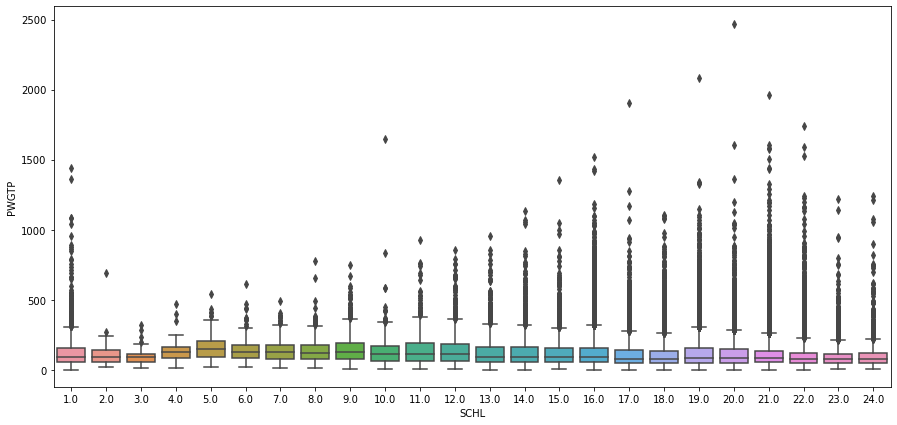

In [150]:
fig, ax = plt.subplots(figsize=[15,7])
sns.boxplot(y='PWGTP',x='SCHL',data=df5,ax=ax)

In [100]:
#df5[df5['WAGP'] == 0]

,POBP,FSEMP,RACBLK,NAICSP,RT,SOCP,OCCP,PINCP,AGEP,RACASN,WAGP,SEX,SCIENGP,COW,PERNP,WKHP,SCHL,RACWHT,WAOB
6259,48,1,0,5411,P,2310XX,2100.0,36000.0,92,0,0.0,1,1.0,6.0,36000.0,40.0,22.0,1,1
9287,48,1,0,5411,P,2310XX,2100.0,36000.0,92,0,0.0,1,1.0,6.0,36000.0,40.0,22.0,1,1
10600,48,1,0,5411,P,2310XX,2100.0,36000.0,92,0,0.0,1,1.0,6.0,36000.0,40.0,22.0,1,1
13292,36,0,0,5241,P,413021,4810.0,90000.0,65,0,0.0,2,2.0,6.0,70000.0,30.0,22.0,1,1
13387,17,0,0,23,P,472061,6260.0,42050.0,73,0,0.0,1,1.0,6.0,4800.0,10.0,21.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261035,48,0,0,6211,P,291210,3090.0,355000.0,40,1,0.0,1,1.0,6.0,355000.0,40.0,23.0,0,1
261036,207,0,0,6211,P,291210,3090.0,355000.0,40,1,0.0,2,1.0,6.0,355000.0,35.0,23.0,0,4
261117,48,0,0,814,P,311122,3602.0,12500.0,61,0,0.0,1,2.0,6.0,12500.0,25.0,21.0,1,1
261152,33,0,0,611M3,P,2530XX,2360.0,11000.0,66,0,0.0,2,2.0,6.0,1000.0,30.0,22.0,1,1


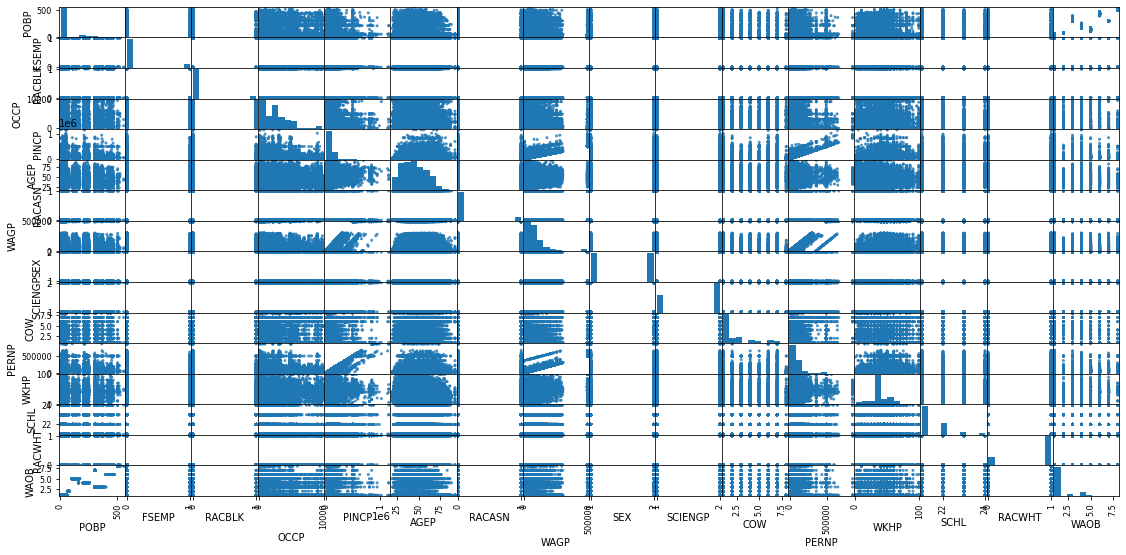

In [101]:
scatter_matrix (df5, alpha=0.8, figsize=(19,9)) 
plt.show()

Text(0.5, 0.98, 'Scatter-matrix for each input variable')

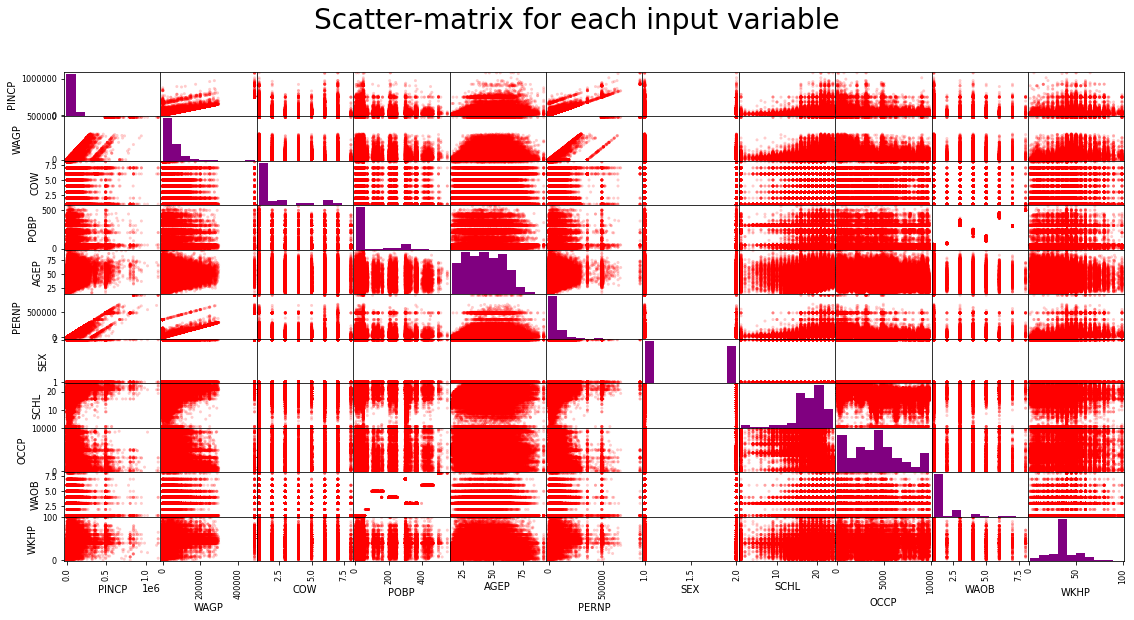

In [131]:
scatter_matrix(df5, figsize= (19,9), alpha=0.2,
c='red', hist_kwds={'color':['purple']}) 
plt.suptitle('Scatter-matrix for each input variable', fontsize=28)

In [151]:
df6 = df5[{'WAOB','AGEP','SEX','SCHL','WAGP','COW','SCIENGP','RACBLK','RACASN','RACWHT','PWGTP','WKHP' }]

C:\Users\palom\AppData\Local\Temp\ipykernel_5968\253076953.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df6 = df5[{'WAOB','AGEP','SEX','SCHL','WAGP','COW','SCIENGP','RACBLK','RACASN','RACWHT','PWGTP','WKHP' }]


In [159]:
df6.corr()


,SCIENGP,COW,RACBLK,WKHP,RACASN,SCHL,RACWHT,PWGTP,AGEP,WAOB,WAGP,SEX
SCIENGP,1.000000,0.080558,-0.042630,0.085184,0.101355,0.580924,0.066131,-0.040396,0.101553,0.018074,0.284940,0.082618
COW,0.080558,1.000000,-0.015433,-0.018988,-0.007037,0.061322,0.031225,-0.042766,0.158071,0.008126,-0.087735,-0.005521
RACBLK,-0.042630,-0.015433,1.000000,-0.022655,-0.077096,0.008016,-0.515551,0.119869,-0.024176,-0.006801,-0.061490,0.032942
WKHP,0.085184,-0.018988,-0.022655,1.000000,-0.006012,0.081683,0.022595,0.031666,0.071202,0.011924,0.313858,-0.178888
RACASN,0.101355,-0.007037,-0.077096,-0.006012,1.000000,0.089950,-0.403506,-0.019532,-0.028038,0.394236,0.066795,0.005282
SCHL,0.580924,0.061322,0.008016,0.081683,0.089950,1.000000,0.104606,-0.053052,0.048600,-0.101367,0.277641,0.074910
RACWHT,0.066131,0.031225,-0.515551,0.022595,-0.403506,0.104606,1.000000,-0.098626,0.057566,-0.292292,0.064158,-0.012245
PWGTP,-0.040396,-0.042766,0.119869,0.031666,-0.019532,-0.053052,-0.098626,1.000000,-0.132648,0.058218,-0.029721,-0.016745
AGEP,0.101553,0.158071,-0.024176,0.071202,-0.028038,0.048600,0.057566,-0.132648,1.000000,0.051957,0.161174,-0.007855
WAOB,0.018074,0.008126,-0.006801,0.011924,0.394236,-0.101367,-0.292292,0.058218,0.051957,1.000000,0.020318,-0.031325


<AxesSubplot:>

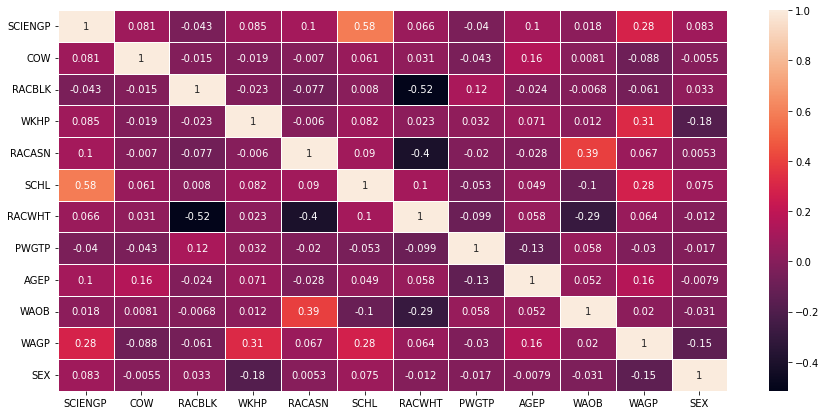

In [155]:
fig, ax = plt.subplots(figsize=[15,7])
sns.heatmap(df6.corr(),annot=True,lw=1,ax=ax)

In [160]:
df7 = df5[{'AGEP','WAGP','PWGTP','WKHP' }]

C:\Users\palom\AppData\Local\Temp\ipykernel_5968\1234415807.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df7 = df5[{'AGEP','WAGP','PWGTP','WKHP' }]


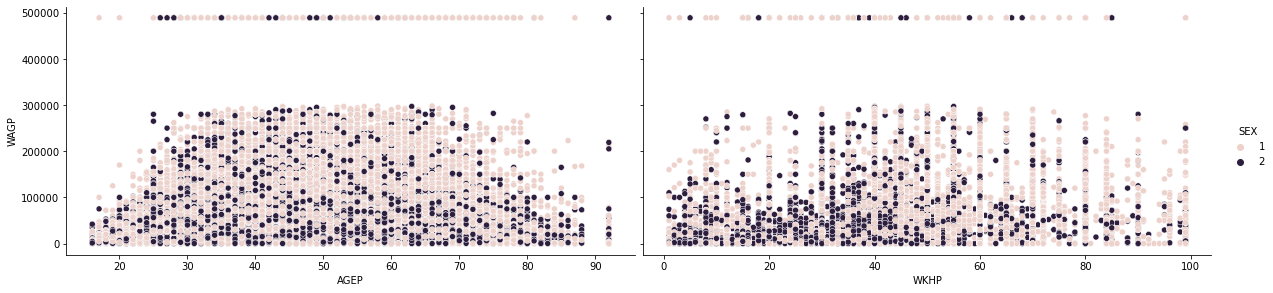

In [156]:
#fig, ax = plt.subplots(figsize=[7,4])
#fig, bx = plt.subplots(figsize=[7,4])
sns.pairplot(df6,x_vars=['AGEP','WKHP'],y_vars=['WAGP'],hue='SEX',height=4.1,aspect=2.1)

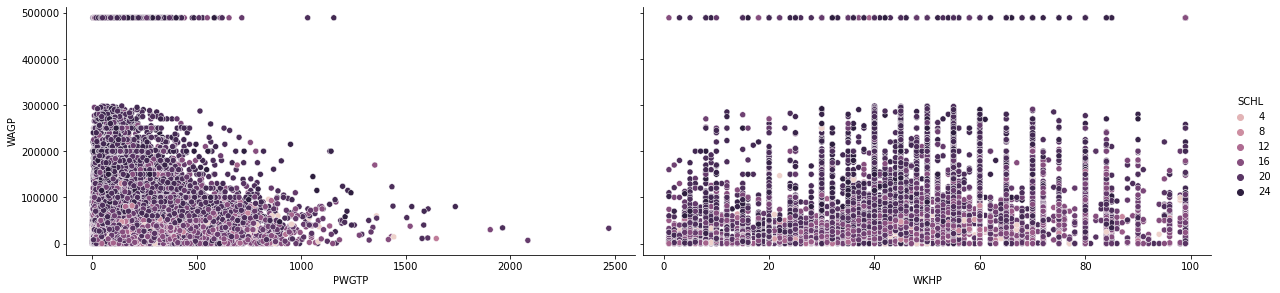

In [158]:
sns.pairplot(df6,x_vars=['PWGTP','WKHP'],y_vars=['WAGP'],hue='SCHL',height=4.1,aspect=2.1)

In [162]:
df7.corr()

,WAGP,PWGTP,WKHP,AGEP
WAGP,1.000000,-0.029721,0.313858,0.161174
PWGTP,-0.029721,1.000000,0.031666,-0.132648
WKHP,0.313858,0.031666,1.000000,0.071202
AGEP,0.161174,-0.132648,0.071202,1.000000


<AxesSubplot:>

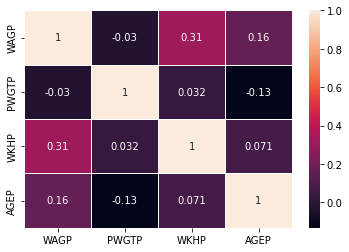

In [161]:
sns.heatmap(df7.corr(),annot=True,lw=1)

<AxesSubplot:>

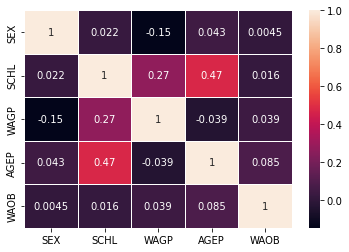

In [171]:
sns.heatmap(df6.corr(),annot=True,lw=1)

Text(0.5, 0.98, 'Scatter-matrix for each input variable')

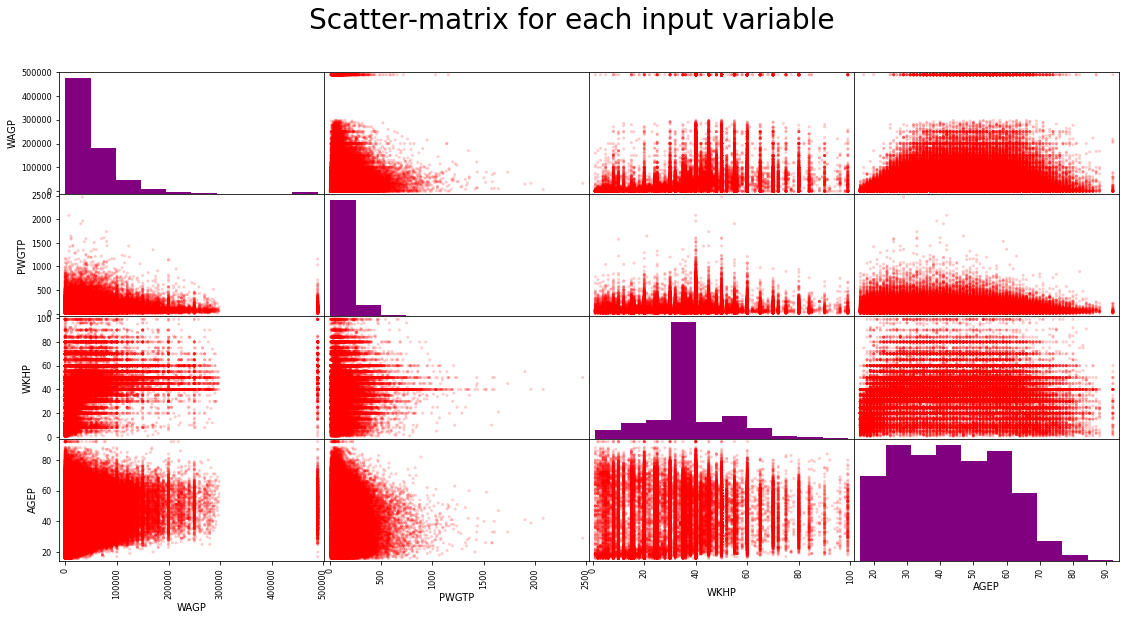

In [163]:
scatter_matrix(df7, figsize= (19,9), alpha=0.2,
c='red', hist_kwds={'color':['purple']}) 
plt.suptitle('Scatter-matrix for each input variable', fontsize=28)

In [137]:
#df6=df6[(df6[['NAICSP','WAOB','AGEP','SEX','SCHL','WAGP']] !=0).all(axis=1)]
#df6 = df5[{'WAOB','AGEP','SEX','SCHL','WAGP','COW','SCIENGP','RACBLK','RACASN','RACWHT','PWGTP','WKHP' }]

In [164]:
print(df6.shape)

(129664, 12)


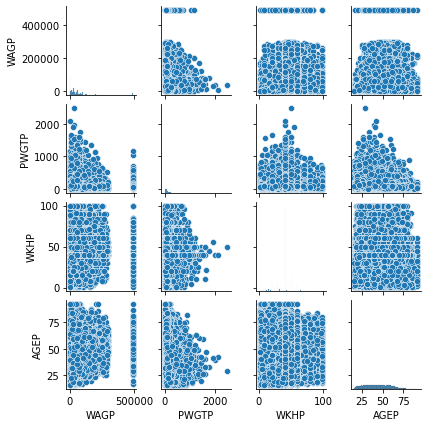

In [167]:
sns.pairplot(df7, height=1.5)

# <font color=lightblue> Create Dummy Variables</font>

In [169]:
df5['WAOB'].unique()

array([1, 3, 4, 2, 6, 5, 7, 8], dtype=int64)

In [172]:
df5['US'] = 0
df5['AEU'] = 0

df5.loc[(df5['WAOB'] == 1) | (df5['WAOB'] == 2) , 'US'] = 1
df5.loc[(df5['WAOB'] == 4) | (df5['WAOB'] == 5) , 'AEU'] = 1


C:\Users\palom\AppData\Local\Temp\ipykernel_5968\810489426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['US'] = 0
C:\Users\palom\AppData\Local\Temp\ipykernel_5968\810489426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['AEU'] = 0


In [173]:
df5[(df5['US'] == 1) | (df5['AEU'] == 1)]

,POBP,FSEMP,RACBLK,NAICSP,RT,SOCP,OCCP,PINCP,AGEP,RACASN,...,PERNP,WKHP,SCHL,RACWHT,PWGTP,WAOB,BACHE,GRADU,US,AEU
0,48,0,0,722Z,P,353031,4110.0,7000.0,21,0,...,7000.0,25.0,19.0,1,31,1,0,0,1,0
9,48,0,0,44511,P,537065,9645.0,13000.0,18,0,...,13000.0,30.0,18.0,1,16,1,0,0,1,0
13,36,0,0,611M2,P,272022,2722.0,500.0,20,1,...,500.0,6.0,19.0,0,31,1,0,0,1,0
14,48,0,0,611M1,P,393031,4420.0,200.0,18,0,...,200.0,4.0,18.0,1,6,1,0,0,1,0
15,48,0,1,611M1,P,439XXX,5940.0,1600.0,20,0,...,1600.0,20.0,19.0,0,65,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261438,26,0,0,531M,P,419020,4920.0,31000.0,52,0,...,31000.0,25.0,20.0,1,83,1,0,0,1,0
261439,26,0,0,52M1,P,113031,120.0,152000.0,63,0,...,109000.0,40.0,21.0,1,94,1,0,0,1,0
261440,26,0,0,713Z,P,272021,2721.0,8000.0,22,0,...,8000.0,37.0,19.0,1,133,1,0,0,1,0
261441,24,0,0,5241,P,151252,1021.0,115000.0,61,0,...,115000.0,40.0,24.0,1,46,1,0,1,1,0


In [174]:
df5['MALE'] = 0

df5.loc[(df5['SEX'] == 1) , 'MALE'] = 1

#df5.loc[df5['NAICSP'].str.startswith(('23','11','21','33','48','49','31','32','42','22','3M')) , 'WHBLCO'] = 1



C:\Users\palom\AppData\Local\Temp\ipykernel_5968\3128391656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['MALE'] = 0


In [176]:
df5.head()

,POBP,FSEMP,RACBLK,NAICSP,RT,SOCP,OCCP,PINCP,AGEP,RACASN,...,WKHP,SCHL,RACWHT,PWGTP,WAOB,BACHE,GRADU,US,AEU,MALE
0,48,0,0,722Z,P,353031,4110.0,7000.0,21,0,...,25.0,19.0,1,31,1,0,0,1,0,1
9,48,0,0,44511,P,537065,9645.0,13000.0,18,0,...,30.0,18.0,1,16,1,0,0,1,0,1
13,36,0,0,611M2,P,272022,2722.0,500.0,20,1,...,6.0,19.0,0,31,1,0,0,1,0,1
14,48,0,0,611M1,P,393031,4420.0,200.0,18,0,...,4.0,18.0,1,6,1,0,0,1,0,0
15,48,0,1,611M1,P,439XXX,5940.0,1600.0,20,0,...,20.0,19.0,0,65,1,0,0,1,0,0


In [170]:
df5['BACHE'] = 0
df5['GRADU'] = 0

df5.loc[(df5['SCHL'] == 1) | (df5['SCHL'] == 2) , 'BACHE'] = 1
df5.loc[df5['SCHL'] > 21  , 'GRADU'] = 1



C:\Users\palom\AppData\Local\Temp\ipykernel_5968\3381236083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['BACHE'] = 0
C:\Users\palom\AppData\Local\Temp\ipykernel_5968\3381236083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['GRADU'] = 0


In [171]:
df5[(df5['GRADU'] == 1) | (df5['BACHE'] == 1)]

,POBP,FSEMP,RACBLK,NAICSP,RT,SOCP,OCCP,PINCP,AGEP,RACASN,...,SCIENGP,COW,PERNP,WKHP,SCHL,RACWHT,PWGTP,WAOB,BACHE,GRADU
850,303,0,0,8131,P,212011,2040.0,31500.0,36,0,...,2.0,2.0,31500.0,40.0,22.0,1,11,3,0,1
1025,13,0,0,6214,P,291123,3160.0,90000.0,26,0,...,2.0,1.0,90000.0,50.0,23.0,1,61,1,0,1
1611,48,0,1,333MS,P,537051,9600.0,11000.0,60,0,...,0.0,1.0,11000.0,36.0,1.0,0,15,1,1,0
2697,4,0,0,6241,P,212011,2040.0,12500.0,59,0,...,2.0,1.0,12500.0,40.0,22.0,1,9,1,0,1
2703,303,0,0,23,P,472XXX,6220.0,20000.0,53,0,...,0.0,1.0,20000.0,40.0,1.0,1,52,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261395,48,0,0,6111,P,119030,230.0,72000.0,61,0,...,2.0,3.0,72000.0,80.0,22.0,1,55,1,0,1
261426,36,0,0,6111,P,252020,2310.0,58000.0,60,0,...,2.0,3.0,58000.0,68.0,22.0,1,74,1,0,1
261427,48,0,0,6111,P,119030,230.0,103000.0,41,0,...,2.0,3.0,103000.0,60.0,22.0,1,80,1,0,1
261441,24,0,0,5241,P,151252,1021.0,115000.0,61,0,...,1.0,1.0,115000.0,40.0,24.0,1,46,1,0,1


In [177]:
df5['SALARYW'] = 0
df5['OWNERW'] = 0

df5.loc[(df5['COW'] <= 5) , 'SALARYW'] = 1
df5.loc[df5['COW'] == 7  , 'OWNERW'] = 1

C:\Users\palom\AppData\Local\Temp\ipykernel_5968\547111326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['SALARYW'] = 0
C:\Users\palom\AppData\Local\Temp\ipykernel_5968\547111326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['OWNERW'] = 0


In [178]:
df5[(df5['SALARYW'] == 1) | (df5['OWNERW'] == 1)]

,POBP,FSEMP,RACBLK,NAICSP,RT,SOCP,OCCP,PINCP,AGEP,RACASN,...,RACWHT,PWGTP,WAOB,BACHE,GRADU,US,AEU,MALE,SALARYW,OWNERW
0,48,0,0,722Z,P,353031,4110.0,7000.0,21,0,...,1,31,1,0,0,1,0,1,1,0
9,48,0,0,44511,P,537065,9645.0,13000.0,18,0,...,1,16,1,0,0,1,0,1,1,0
13,36,0,0,611M2,P,272022,2722.0,500.0,20,1,...,0,31,1,0,0,1,0,1,1,0
14,48,0,0,611M1,P,393031,4420.0,200.0,18,0,...,1,6,1,0,0,1,0,0,1,0
15,48,0,1,611M1,P,439XXX,5940.0,1600.0,20,0,...,0,65,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261440,26,0,0,713Z,P,272021,2721.0,8000.0,22,0,...,1,133,1,0,0,1,0,1,1,0
261441,24,0,0,5241,P,151252,1021.0,115000.0,61,0,...,1,46,1,0,1,1,0,1,1,0
261442,72,0,0,5415,P,413091,4840.0,150000.0,61,0,...,1,78,2,0,1,1,0,0,1,0
261443,373,1,0,492,P,435021,5510.0,26700.0,44,0,...,1,248,3,0,0,0,0,0,1,0


In [184]:
dflr = df5[{'AGEP','WKHP','US','AEU','MALE','GRADU','BACHE','SALARYW','OWNERW','WAGP'}]

C:\Users\palom\AppData\Local\Temp\ipykernel_5968\3648399855.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dflr = df5[{'AGEP','WKHP','US','AEU','MALE','GRADU','BACHE','SALARYW','OWNERW','WAGP'}]


In [185]:
dflr.head(20)

,WKHP,BACHE,AEU,GRADU,AGEP,US,WAGP,OWNERW,MALE,SALARYW
0,25.0,0,0,0,21,1,7000.0,0,1,1
9,30.0,0,0,0,18,1,13000.0,0,1,1
13,6.0,0,0,0,20,1,500.0,0,1,1
14,4.0,0,0,0,18,1,200.0,0,0,1
15,20.0,0,0,0,20,1,1600.0,0,0,1
19,40.0,0,0,0,29,1,3800.0,0,1,1
20,40.0,0,0,0,64,1,18000.0,0,1,1
21,40.0,0,0,0,22,1,22000.0,0,1,1
22,50.0,0,0,0,37,1,90000.0,0,1,1
23,40.0,0,0,0,20,1,2000.0,0,1,1


In [181]:
print(dflr.shape)

(129664, 10)


In [183]:
print(dflr.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129664 entries, 0 to 261444
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   WKHP     129664 non-null  float64
 1   BACHE    129664 non-null  int64  
 2   AEU      129664 non-null  int64  
 3   GRADU    129664 non-null  int64  
 4   AGEP     129664 non-null  int64  
 5   US       129664 non-null  int64  
 6   WAGP     129664 non-null  float64
 7   OWNERW   129664 non-null  int64  
 8   MALE     129664 non-null  int64  
 9   SALARYW  129664 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 14.9 MB
None


## LINEAR REGRESION 
### STEP 1: Separate the Dataset into Input & Output NumPy Arrays 
-	Store the dataframe d2 values into a NumPy array
-	Separate the array into input and output components by slicing 

In [186]:
#Separate the dependent from the independent variables. 
array = dflr.values
X = array [:,[0,1,2,3,4,5,7,8,9]]
Y = array [:,6]

In [189]:
X.shape


(129664, 9)

### STEP 2: Split into Input/Output Array into Training/Testing Datasets 
-	Split the dataset into training at 67% and test at 33% with the seed = 7

In [190]:
#Selection of records to include in which sub-dataset must be done randomly
# use the for seed randomization
test_size = 0.33
seed = 7
# Split the dataset (both input & output) into training/testing datasets
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.33,
random_state=seed)
X_train.shape

(86874, 9)

## <font color=lightblue> TRAIN MODEL </font>

### STEP 3: Build and Train the Model 
-	Assign LinearRegression to the model
-	Train the model 
-	Print the intercept and coefficients
-	Print the list of the coefficients with their correspondent variable name

In [191]:
#Assign LinearRegression to the model
model = LinearRegression()

In [192]:
#Train the model
reg = model.fit(X_train, Y_train)

In [193]:
#Print the intercept and coefficients
print ("Intercept:", reg.intercept_)
print ("Coefficients:", reg.coef_)

Intercept: -93421.23353624818
Coefficients: [  1302.61387251 -14080.96350139  19626.06457212  48782.53278423
    597.31323087  11801.78875007  63193.35845697  15483.08043019
  46672.8424576 ]


In [203]:
#Print the list of the coefficients with their correspondent variable name
names_2 = ['WKHP','BACHE','AEU','GRADU','AGEP','US','OWNERW','MALE','SALARYW']
coeffs_zip = zip(names_2, reg.coef_)
# Convert iterator into a set
coeffs = set(coeffs_zip)
# Print (coeffs)
for coef in coeffs:
    print (coef, "\n")

('BACHE', -14080.963501386306) 

('US', 11801.788750073873) 

('SALARYW', 46672.842457602696) 

('GRADU', 48782.53278422593) 

('WKHP', 1302.6138725146875) 

('AGEP', 597.3132308680757) 

('OWNERW', 63193.35845697323) 

('AEU', 19626.064572124906) 

('MALE', 15483.08043018768) 



## <font color=lightblue> SCORE MODEL </font>

## STEP 4: Calculate R-Squared 
-	Calculate the R-Squared 
-	Print the score

** Note: The higher the R-squared, the better (0 – 100%). Depending on the model, the best models score above 83%. The R-squared value tells us how well the independent variables predict the dependent variable, which is very low. Think about how you could increase the R-squared. What variables would you use? 

In [204]:
#What is this for???
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [205]:
#Calculate the R-Squared
R_squared = model.score(X_test, Y_test)
print("R-squared: ", R_squared)

R-squared:  0.23681191222626774


### Step 5: Prediction 
-	Execute model prediction
-	We have now trained the model. Let's use the trained model to predict the "Salary of an individual" WAGP
-	We are using the following predictors: 


- WKHP: Works 50 hours a week 
- BACHE: has also 0
- AEU: then will be = 0 
- GRADU: Let say has and MBA = 1
- AGEP: He  is a Male 30 years old
- US: US citizent = 1
- OWNER: Then will be =0
- MALE:  Will be = 1
- SALARYW: Work for a company =1


** Note: The model predicts that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around $24,144. 

In [206]:
model.predict([[50,0,0,1,30,1,0,1,1]])

array([112369.10143762])

### Case 2 prediction: 
* Male from the US, 30 years old with a graduate degree. Works 50 hr/wk but owner of a business

In [209]:
model.predict([[50,0,0,1,30,1,1,1,0]])

array([160079.3794644])

### Case 3 prediction:
* Male from Asia or Europe, 30 years old with a graduate degree. Works 50 hr/wk but owner of a business

In [207]:
model.predict([[50,0,0,1,30,0,1,1,0]])

array([163760.67114452])

### Case 4 prediction:
* Male from US, 40 years old with a graduate or bachelor degree. Works 50 hr/wk and is a salary employee.

In [211]:
model.predict([[50,0,0,0,40,1,0,1,1]])

array([69559.70096207])

### Case 5 prediction:
* Male from US, 40 years old with a graduate or bachelor degree. Works 50 hr/wk and is a salary employee.

In [ ]:
model.predict([[40,0,0,1,40,0,1,0,1]])

## <font color=lightblue> EVALUATE MODELS </font>

### Step 6: Train & Score Model 2 Using K-Fold Cross Validation Data Split
-	Specify the k-size to 10
-	Fix the random seed to 7
-	Split the entire data set
-	Obtain the Mean squared error
-	Train the model and run K-fold cross-validation
-	Print results

In [212]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'

In [213]:
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold crossvalidation
print("Average of all results from the K-fold Cross-Validation",end="")
print(",using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross-Validation,using negative mean squared error: -3525537755.348807


### Step 7: Score Using Explained Variance
Let's use a different scoring parameter. Here we use the Explained Variance. The best possible score is 1.0; lower values are worse.
-	Specify the k-size to 10
-	Set the seed to 7
-	Split the entire data set
-	Obtain the explained variance score
-	Train the model and run K-fold cross-validation
-	Print results

In [214]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed must use the same seed value so that the same subsets
# can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use explained variance value to evaluate the model/algorithm
scoring = 'explained_variance'

In [215]:
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold crossvalidation
print("Average of all results from the K-fold Cross Validation",end="")
print(" using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation using exlpained variance: 0.23548372748977942


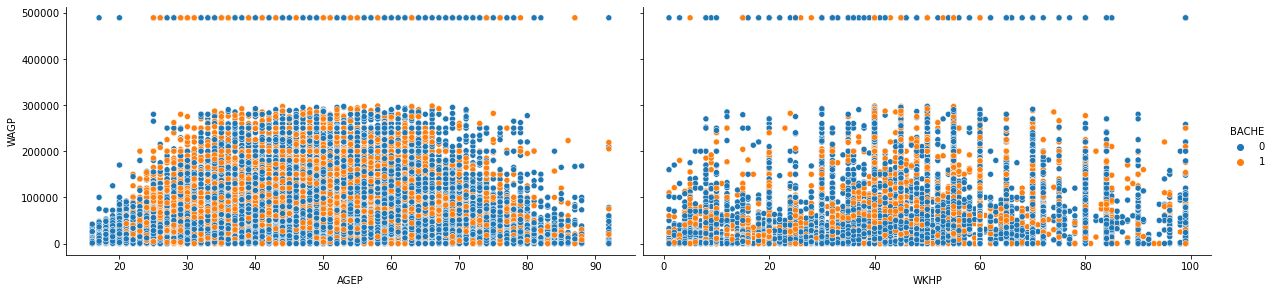

In [213]:
sns.pairplot(df5,x_vars=['AGEP','WKHP'],y_vars=['WAGP'],hue='BACHE',height=4.1,aspect=2.1)

<AxesSubplot:>

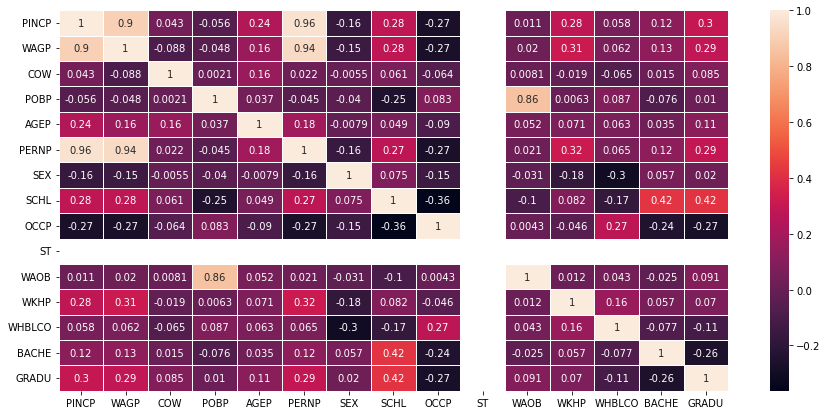

In [214]:
fig, ax = plt.subplots(figsize=[15,7])
sns.heatmap(df5.corr(),annot=True,lw=1,ax=ax)

In [60]:
df5.loc[df5['WAGP'] > 0   , 'WAGP'] = df5['WAGP']/100000

# 4. Delete/Output

### 4.1 Output to csv

In [22]:
df5.to_csv('outputdf5')

### 4.2 Output to Jason

In [225]:
##df.to_json()

### 4.3 Output to HTML

In [226]:
##df.to_html()

### 4.4 Delete Dataframe

In [227]:
#del df

In [228]:
#df.head()